In [1]:
##############################################################
#                                                            #
#    Mark Hoogendoorn and Burkhardt Funk (2017)              #
#    Machine Learning for the Quantified Self                #
#    Springer                                                #
#    Chapter 5                                               #
#                                                            #
##############################################################

from Chapter5.DistanceMetrics import InstanceDistanceMetrics
from Chapter5.DistanceMetrics import PersonDistanceMetricsNoOrdering
from Chapter5.DistanceMetrics import PersonDistanceMetricsOrdering
from Chapter5.Clustering import NonHierarchicalClustering
from Chapter5.Clustering import HierarchicalClustering
import util.util as util
from util.VisualizeDataset import VisualizeDataset

import sys
import os
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# As usual, we set our program constants, read the input file and initialize a visualization object.
DATA_PATH = Path('./intermediate_datafiles/')
DATASET_FNAME = 'chapter4_result.csv'
RESULT_FNAME = 'chapter5_result.csv'

In [3]:
try:
    dataset = pd.read_csv(DATA_PATH / DATASET_FNAME, index_col=0)
    dataset = dataset[:14780]
    dataset.index = pd.to_datetime(dataset.index)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e
    
__file__ = 'Assignment_2_5.ipynb'
DataViz = VisualizeDataset(__file__)

In [4]:
attributes_to_cluster = ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z']

In [5]:
# We'll start by applying non-hierarchical clustering.
clusteringNH = NonHierarchicalClustering()

# Let us look at k-means first.
k_values = range(2, 10)
silhouette_values = []

===== kmeans clustering =====
k = 2
silhouette = 0.6696228841478076
k = 3
silhouette = 0.7029893694831756
k = 4
silhouette = 0.6650784152470159
k = 5
silhouette = 0.6855163000910726
k = 6
silhouette = 0.6799603998392827
k = 7
silhouette = 0.6839784986566044
k = 8
silhouette = 0.684707799270711
k = 9
silhouette = 0.6824898976522339
Figure saved to figures/Assignment_2_5/figure_1.png


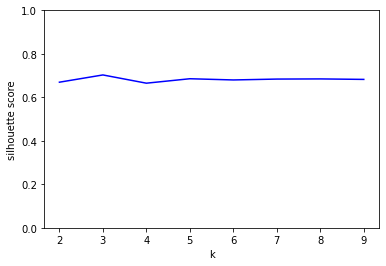

In [6]:
## Do some initial runs to determine the right number for k

print('===== kmeans clustering =====')
for k in k_values:
    print(f'k = {k}')
    dataset_cluster = clusteringNH.k_means_over_instances(copy.deepcopy(dataset), attributes_to_cluster, k, 'default', 20, 10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print(f'silhouette = {silhouette_score}')
    silhouette_values.append(silhouette_score)

DataViz.plot_xy(x=[k_values], y=[silhouette_values], xlabel='k', ylabel='silhouette score',
                ylim=[0,1], line_styles=['b-'])

Highest K-Means silhouette score: k = 3
Figure saved to figures/Assignment_2_5/figure_2.png


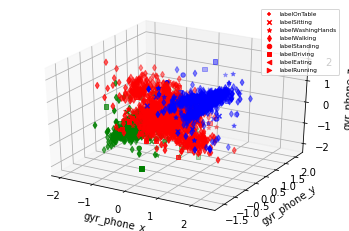

Figure saved to figures/Assignment_2_5/figure_3.png


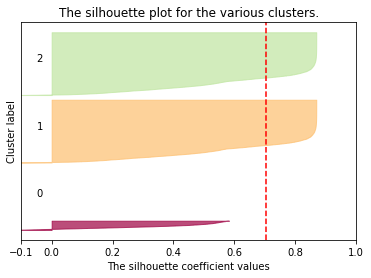

\multirow{2}{*}{ gyr_phone_x } & mean  &  -0.01 &  -0.94 &  0.97\\
 & std  &  0.23 &  0.38 &  0.36\\
\multirow{2}{*}{ gyr_phone_y } & mean  &  0.02 &  -0.03 &  0.12\\
 & std  &  0.23 &  0.43 &  0.44\\
\multirow{2}{*}{ gyr_phone_z } & mean  &  0.00 &  -0.79 &  0.75\\
 & std  &  0.19 &  0.36 &  0.40\\
labelOnTable  & percentage  &  99.92 \% &  0.08 \% &  0.00 \%\\
labelSitting  & percentage  &  98.83 \% &  0.62 \% &  0.55 \%\\
labelWashingHands  & percentage  &  95.24 \% &  1.43 \% &  3.33 \%\\
labelWalking  & percentage  &  47.86 \% &  25.85 \% &  26.29 \%\\
labelStanding  & percentage  &  98.09 \% &  0.95 \% &  0.95 \%\\
labelDriving  & percentage  &  98.70 \% &  0.53 \% &  0.77 \%\\
labelEating  & percentage  &  0.00 \% &  0.00 \% &  0.00 \%\\
labelRunning  & percentage  &  0.00 \% &  0.00 \% &  0.00 \%\\


In [7]:
# And run the knn with the highest silhouette score

# k = 6 # todo: replaced with np.argmax call over silhouette scores
k = k_values[np.argmax(silhouette_values)]
print(f'Highest K-Means silhouette score: k = {k}')

dataset_knn = clusteringNH.k_means_over_instances(copy.deepcopy(dataset), attributes_to_cluster, k, 'default', 50, 50)
DataViz.plot_clusters_3d(dataset_knn, attributes_to_cluster, 'cluster', ['label'])
DataViz.plot_silhouette(dataset_knn, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_knn, 'cluster', attributes_to_cluster, 'label')
del dataset_knn['silhouette']

===== k medoids clustering =====
k = 2
silhouette = 0.6829842630455694
k = 3
silhouette = 0.7029523451168641
k = 4
silhouette = 0.653907512462722
k = 5
silhouette = 0.6617847497428694
k = 6
silhouette = 0.6595800481919719
k = 7
silhouette = 0.6605356764092093
k = 8
silhouette = 0.6570068314057811
k = 9
silhouette = 0.6012589587471494
Figure saved to figures/Assignment_2_5/figure_4.png


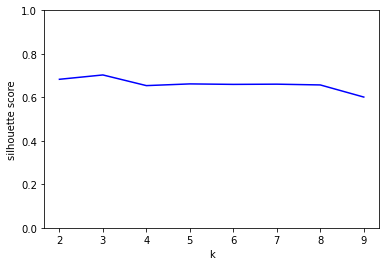

In [8]:
k_values = range(2, 10)
silhouette_values = []

# Do some initial runs to determine the right number for k

print('===== k medoids clustering =====')
for k in k_values:
    print(f'k = {k}')
    dataset_cluster = clusteringNH.k_medoids_over_instances(copy.deepcopy(dataset), attributes_to_cluster, k, 'default', 20, n_inits=10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print(f'silhouette = {silhouette_score}')
    silhouette_values.append(silhouette_score)

DataViz.plot_xy(x=[k_values], y=[silhouette_values], xlabel='k', ylabel='silhouette score',
                ylim=[0,1], line_styles=['b-'])

Highest K-Medoids silhouette score: k = 3
Figure saved to figures/Assignment_2_5/figure_5.png


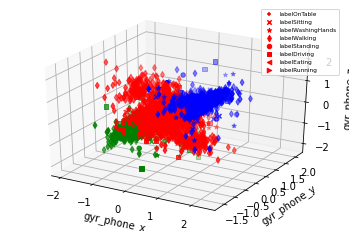

Figure saved to figures/Assignment_2_5/figure_6.png


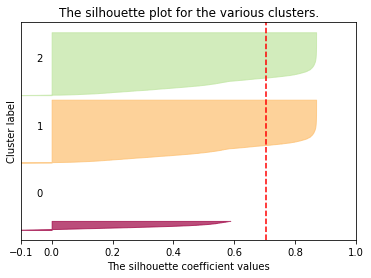

\multirow{2}{*}{ gyr_phone_x } & mean  &  -0.01 &  -0.93 &  0.96\\
 & std  &  0.24 &  0.40 &  0.38\\
\multirow{2}{*}{ gyr_phone_y } & mean  &  0.02 &  -0.02 &  0.15\\
 & std  &  0.23 &  0.44 &  0.44\\
\multirow{2}{*}{ gyr_phone_z } & mean  &  0.00 &  -0.82 &  0.78\\
 & std  &  0.18 &  0.33 &  0.36\\
labelOnTable  & percentage  &  99.92 \% &  0.08 \% &  0.00 \%\\
labelSitting  & percentage  &  98.90 \% &  0.55 \% &  0.55 \%\\
labelWashingHands  & percentage  &  95.56 \% &  1.27 \% &  3.17 \%\\
labelWalking  & percentage  &  48.91 \% &  25.41 \% &  25.68 \%\\
labelStanding  & percentage  &  98.00 \% &  0.95 \% &  1.05 \%\\
labelDriving  & percentage  &  98.76 \% &  0.59 \% &  0.65 \%\\
labelEating  & percentage  &  0.00 \% &  0.00 \% &  0.00 \%\\
labelRunning  & percentage  &  0.00 \% &  0.00 \% &  0.00 \%\\


In [9]:
# And run k medoids with the highest silhouette score

# k = 6 # todo: replaced with np.argmax call over silhouette scores
k = k_values[np.argmax(silhouette_values)]
print(f'Highest K-Medoids silhouette score: k = {k}')

dataset_kmed = clusteringNH.k_medoids_over_instances(copy.deepcopy(dataset), attributes_to_cluster, k, 'default', 20, n_inits=50)
DataViz.plot_clusters_3d(dataset_kmed, attributes_to_cluster, 'cluster', ['label'])
DataViz.plot_silhouette(dataset_kmed, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_kmed, 'cluster', attributes_to_cluster, 'label')

===== agglomerative clustering =====
k = 2
silhouette = 0.6849557693562199
Figure saved to figures/Assignment_2_5/figure_7.png


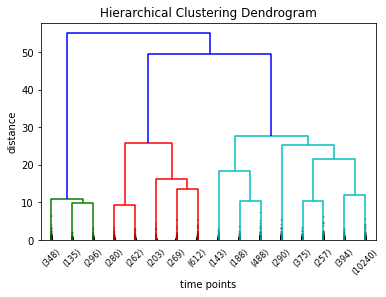

k = 3
silhouette = 0.6363780201412788
k = 4
silhouette = 0.6324185381918712
k = 5
silhouette = 0.6171328764496107
k = 6
silhouette = 0.638887750208497
k = 7
silhouette = 0.6495336276581967
k = 8
silhouette = 0.6542614744793814
k = 9
silhouette = 0.6584931351454744
Figure saved to figures/Assignment_2_5/figure_8.png


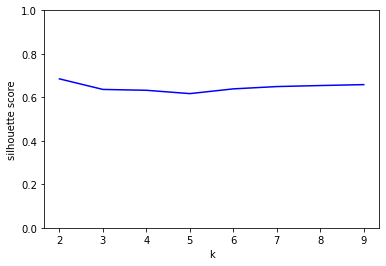

In [10]:
# And the hierarchical clustering is the last one we try

clusteringH = HierarchicalClustering()

k_values = range(2, 10)
silhouette_values = []

# Do some initial runs to determine the right number for the maximum number of clusters.

print('===== agglomerative clustering =====')
for k in k_values:
    print(f'k = {k}')
    dataset_cluster, l = clusteringH.agglomerative_over_instances(copy.deepcopy(dataset), attributes_to_cluster, k, 'euclidean', use_prev_linkage=True, link_function='ward')
    silhouette_score = dataset_cluster['silhouette'].mean()
    print(f'silhouette = {silhouette_score}')
    silhouette_values.append(silhouette_score)
    if k == k_values[0]:
        DataViz.plot_dendrogram(dataset_cluster, l)

DataViz.plot_xy(x=[k_values], y=[silhouette_values], xlabel='k', ylabel='silhouette score',
                ylim=[0,1], line_styles=['b-'])

# And we select the outcome dataset of the knn clustering....

dataset_knn.to_csv(DATA_PATH / RESULT_FNAME)